# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

#### Student Information  
- **First Name**: Parsa
- **Last Name**: Ghezelbash
- **Student ID**: 401110437

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [2]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

np.random.seed(13)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [3]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    params = {}

    params['W1'] = np.random.randn(input_size, hidden_size) * 0.1
    params['W2'] = np.random.randn(hidden_size, output_size) * 0.1

    params['b1'] = np.zeros(hidden_size)
    params['b2'] = np.zeros(output_size)

    return params



TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [4]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(x, 0)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return (x > 0).astype(float)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    sig = sigmoid(x)
    return sig * (1 - sig)

def softmax(x):
    e = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e / np.sum(e, axis=1, keepdims=True)


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [5]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2)

    return A2, {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [6]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    return  - np.mean(np.sum(y_true * np.log(y_pred + 1e-15), axis=1), axis=0)

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [7]:
def clip_gradients(gradients, clip_value=1.0):
    for key in gradients.keys():
        np.clip(gradients[key], -clip_value, clip_value, out=gradients[key])
    return gradients

In [8]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    W1, W2, b1, b2 = parameters['W1'], parameters['W2'], parameters['b1'], parameters['b2']

    Z1, A1, Z2, A2 = cache['Z1'], cache['A1'], cache['Z2'], cache['A2']

    n = X.shape[0]
    dZ2 = (A2 - y_true) / n

    db2 = np.sum(dZ2, axis=0)
    dW2 = A1.T @ dZ2

    dA1 = dZ2 @ W2.T

    dZ1 = dA1 * relu_derivative(Z1)
    db1 = np.sum(dZ1, axis=0)
    dW1 = X.T @ dZ1


    return clip_gradients({'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2})

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [9]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for param in parameters:
        parameters[param] -= learning_rate * gradients[param]

    return parameters

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [10]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])

    cache = None
    gradients = None
    losses = []

    print(f"Training with hidden layer size: {hidden_size}")

    for i in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters(parameters, gradients, learning_rate)

        losses.append(compute_loss(y_pred=y_pred, y_true=y_train))

        if ((i+1) % 10) == 0:
            print(f"Epoch {i+1}, Loss: {np.round(losses[i], 3)}")

    return losses

hidden_sizes = [32, 64, 128]
for hidden_size in hidden_sizes:
    train_model(x_train, y_train, hidden_size, epochs=50)
    print("")

Training with hidden layer size: 32
Epoch 10, Loss: 2.36
Epoch 20, Loss: 2.253
Epoch 30, Loss: 2.176
Epoch 40, Loss: 2.11
Epoch 50, Loss: 2.048

Training with hidden layer size: 64
Epoch 10, Loss: 2.177
Epoch 20, Loss: 2.045
Epoch 30, Loss: 1.946
Epoch 40, Loss: 1.863
Epoch 50, Loss: 1.789

Training with hidden layer size: 128
Epoch 10, Loss: 2.262
Epoch 20, Loss: 2.038
Epoch 30, Loss: 1.883
Epoch 40, Loss: 1.753
Epoch 50, Loss: 1.642



TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [11]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}
    t = 0

    for param in parameters:
        v[param] = np.zeros_like(parameters[param])
        s[param] = np.zeros_like(parameters[param])

    return v, s, t

def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1

    for param in parameters:
        v[param] = v[param] * beta1 + gradients[param] * (1 - beta1)
        s[param] = s[param] * beta2 + gradients[param]**2 * (1 - beta2)

        s_hat = s[param] / (1 - beta2**t)
        v_hat = v[param] / (1 - beta1**t)

        parameters[param] -= learning_rate / np.sqrt(s_hat + epsilon) * v_hat

    return parameters, v, s, t

TODO: Implement Adam optimizer into the training loop.

In [12]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])
    v, s, t = initialize_adam(parameters)
    cache = None
    gradients = None
    losses = []

    print(f"Training with hidden layer size: {hidden_size}")

    for i in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=learning_rate)

        losses.append(compute_loss(y_pred=y_pred, y_true=y_train))

        if ((i+1) % 10) == 0:
            print(f"Epoch {i+1}, Loss: {np.round(losses[i], 3)}")

    return losses

### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [13]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}

    for param in parameters:
        s[param] = np.zeros_like(parameters[param])

    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for param in parameters:
        s[param] = s[param] * beta + gradients[param]**2 * (1 - beta)
        parameters[param] -= learning_rate / np.sqrt(s[param] + epsilon) * gradients[param]

    return parameters, s

TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [14]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])

    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    else:
        s = initialize_rmsprop(parameters)

    cache = None
    gradients = None
    losses = []

    print(f"Training with hidden layer size: {hidden_size}")

    for i in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=learning_rate)
        else:
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=learning_rate)

        losses.append(compute_loss(y_pred=y_pred, y_true=y_train))

        if ((i+1) % 10) == 0:
            print(f"Epoch {i+1}, Loss: {np.round(losses[i], 3)}")

    return losses

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

RMSprop:
Training with hidden layer size: 32
Epoch 10, Loss: 1.611
Epoch 20, Loss: 1.234
Epoch 30, Loss: 1.009
Epoch 40, Loss: 0.878
Epoch 50, Loss: 0.799

Adam:
Training with hidden layer size: 32
Epoch 10, Loss: 1.809
Epoch 20, Loss: 1.463
Epoch 30, Loss: 1.201
Epoch 40, Loss: 1.012
Epoch 50, Loss: 0.889


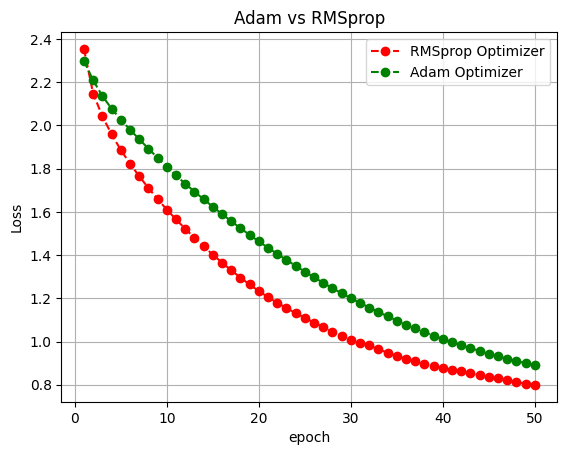

In [15]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print("RMSprop:")
    RMSprop_losses = train_model(X_train, y_train, hidden_size, epochs=epochs, optimizer='rmsprop')

    print("\nAdam:")
    Adam_losses = train_model(X_train, y_train, hidden_size, epochs=epochs, optimizer='adam')

    plt.plot(range(1, epochs+1), RMSprop_losses, label='RMSprop Optimizer', marker='o', linestyle='--', c='red')
    plt.plot(range(1, epochs+1), Adam_losses, label='Adam Optimizer', marker='o', linestyle='--', c='green')

    plt.title('Adam vs RMSprop')

    plt.xlabel('epoch')
    plt.ylabel('Loss')

    plt.grid()
    plt.legend()
    plt.show()

compare_optimizers(x_train, y_train, 32, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [16]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for param in parameters:
        parameters[param] -= learning_rate * gradients[param]

    return parameters

2. Modify the Training Loop


In [17]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])

    cache = None
    gradients = None
    losses = []

    print(f"Training with hidden layer size: {hidden_size}")

    for i in range(epochs):
        epoch_losses = []
        for X, y in zip(X_train, y_train):
            X = X.reshape(1, -1)
            y = y.reshape(1, -1)

            y_pred, cache = forward_propagation(X, parameters)

            gradients = backward_propagation(X, y, parameters, cache)

            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

            epoch_losses.append(compute_loss(y_pred=y_pred, y_true=y))

        losses.append(np.mean(epoch_losses))

        if ((i+1) % 10) == 0:
            print(f"Epoch {i+1}, Loss: {np.round(losses[i], 3)}")

    return losses

3. Experiment with Different Learning Rates


learning rate: 0.001
Training with hidden layer size: 32
Epoch 10, Loss: 0.393
Epoch 20, Loss: 0.378
Epoch 30, Loss: 0.376
Epoch 40, Loss: 0.376
Epoch 50, Loss: 0.378

learning rate: 0.01
Training with hidden layer size: 32
Epoch 10, Loss: 0.433
Epoch 20, Loss: 0.387
Epoch 30, Loss: 0.366
Epoch 40, Loss: 0.352
Epoch 50, Loss: 0.335

learning rate: 0.1
Training with hidden layer size: 32
Epoch 10, Loss: 0.947
Epoch 20, Loss: 0.879
Epoch 30, Loss: 0.859
Epoch 40, Loss: 0.843
Epoch 50, Loss: 0.826



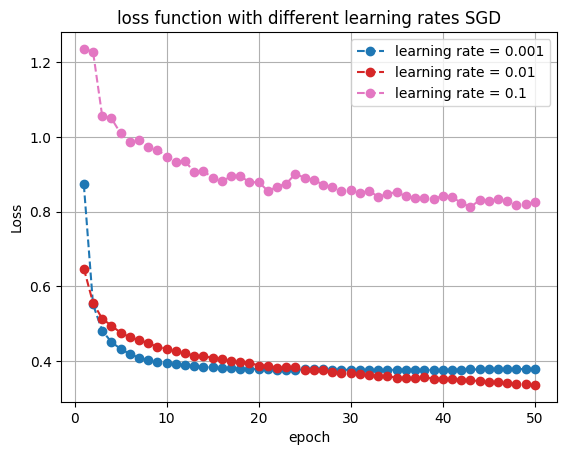

In [18]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    losses = {}

    colors = plt.colormaps['tab10']

    for i, learning_rate in enumerate(learning_rates):
        print(f"learning rate: {learning_rate}")

        losses[learning_rate] = train_model_with_sgd(X_train, y_train, hidden_size, epochs=epochs, learning_rate=learning_rate)
        print("")

        plt.plot(range(1, epochs+1), losses[learning_rate], marker='o', linestyle='--', label=f'learning rate = {learning_rate}', color=colors(i / len(learning_rates)))

    plt.title('loss function with different learning rates SGD')

    plt.xlabel('epoch')
    plt.ylabel('Loss')

    plt.grid()
    plt.legend()
    plt.show()

compare_learning_rates(x_train, y_train, 32, epochs=50)

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [19]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}

    for param in parameters:
        v[param] = np.zeros_like(parameters[param])

    return v


def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for param in parameters:
        v[param] = v[param] * beta + learning_rate * gradients[param]

        parameters[param] -= v[param]

    return parameters, v

3. Modify the Training Loop


In [20]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])

    if optimizer != 'sgd':
        v = initialize_momentum(parameters)

    cache = None
    gradients = None
    losses = []

    print(f"Training with hidden layer size: {hidden_size}")

    for i in range(epochs):
        epoch_losses = []
        for X, y in zip(X_train, y_train):
            X = X.reshape(1, -1)
            y = y.reshape(1, -1)

            y_pred, cache = forward_propagation(X, parameters)

            gradients = backward_propagation(X, y, parameters, cache)

            if optimizer == 'sgd':
                parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
            else:
                parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate=learning_rate)

            epoch_losses.append(compute_loss(y_pred=y_pred, y_true=y))

        losses.append(np.mean(epoch_losses))

        if ((i+1) % 10) == 0:
            print(f"Epoch {i+1}, Loss: {np.round(losses[i], 3)}")

    return losses

4. Train the Model with Both Optimizers


SGD
Training with hidden layer size: 32
Epoch 10, Loss: 0.444
Epoch 20, Loss: 0.407
Epoch 30, Loss: 0.381
Epoch 40, Loss: 0.358
Epoch 50, Loss: 0.338

SGD + Momentum
Training with hidden layer size: 32
Epoch 10, Loss: 0.967
Epoch 20, Loss: 0.923
Epoch 30, Loss: 0.927
Epoch 40, Loss: 0.886
Epoch 50, Loss: 0.874



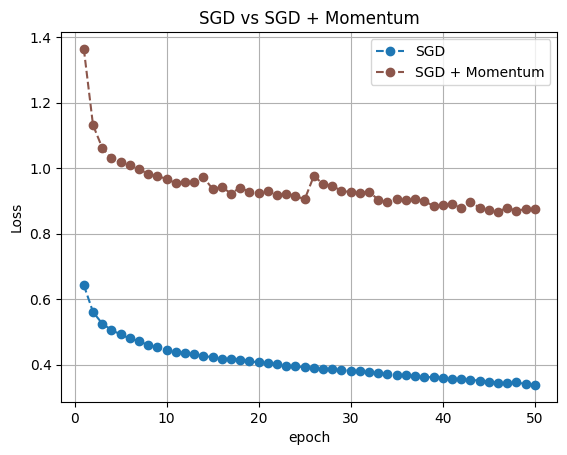

In [21]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    colors = plt.colormaps['tab10']

    print("SGD")
    sgd_losses = train_model(X_train, y_train, hidden_size, epochs=epochs, optimizer='sgd')
    print("")
    plt.plot(range(1, epochs+1), sgd_losses, marker='o', linestyle='--', label='SGD', color=colors(0))

    print("SGD + Momentum")
    sgd_momentum_losses = train_model(X_train, y_train, hidden_size, epochs=epochs, optimizer='sgd_momentum')
    print("")
    plt.plot(range(1, epochs+1), sgd_momentum_losses, marker='o', linestyle='--', label='SGD + Momentum', color=colors(1 / 2))

    plt.title('SGD vs SGD + Momentum')
    plt.xlabel('epoch')
    plt.ylabel('Loss')

    plt.grid()
    plt.legend()
    plt.show()

compare_sgd_and_momentum(x_train, y_train, 32, epochs=50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [22]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])

    # n = X_train.shape[0]
    # batches = [(X_train[i: min(i + batch_size, n)], y_train[i: min(i + batch_size, n)]) for i in range(0, n, batch_size)]
    # t = []
    # for X_batch, y_batch in batches:
    #     y_pred, cache = forward_propagation(X_batch, parameters)

    #     t.append(compute_loss(y_pred=y_pred, y_true=y_batch))
    # print(np.mean(t))
    
    v = initialize_momentum(parameters)

    cache = None
    gradients = None
    losses = []

    n = X_train.shape[0]

    random_indices = np.random.permutation(X_train.shape[0])

    X_train = X_train[random_indices]
    y_train = y_train[random_indices]

    batches = [(X_train[i: min(i + batch_size, n)], y_train[i: min(i + batch_size, n)]) for i in range(0, n, batch_size)]

    print(f"Training with hidden layer size: {hidden_size}")

    for i in range(epochs):
        epoch_losses = []
        for X_batch, y_batch in batches:
            y_pred, cache = forward_propagation(X_batch, parameters)

            gradients = backward_propagation(X_batch, y_batch, parameters, cache)

            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate=learning_rate)

            epoch_losses.append(compute_loss(y_pred=y_pred, y_true=y_batch))

        losses.append(np.mean(epoch_losses))

        if ((i+1) % 10) == 0:
            print(f"Epoch {i+1}, Loss: {np.round(losses[i], 3)}")

    return losses

2. Train the Model with Different Mini-Batch Sizes


batch size: 16
Training with hidden layer size: 32
Epoch 10, Loss: 0.302
Epoch 20, Loss: 0.261
Epoch 30, Loss: 0.238
Epoch 40, Loss: 0.224
Epoch 50, Loss: 0.21

batch size: 32
Training with hidden layer size: 32
Epoch 10, Loss: 0.313
Epoch 20, Loss: 0.269
Epoch 30, Loss: 0.243
Epoch 40, Loss: 0.225
Epoch 50, Loss: 0.21

batch size: 64
Training with hidden layer size: 32
Epoch 10, Loss: 0.326
Epoch 20, Loss: 0.281
Epoch 30, Loss: 0.252
Epoch 40, Loss: 0.232
Epoch 50, Loss: 0.216



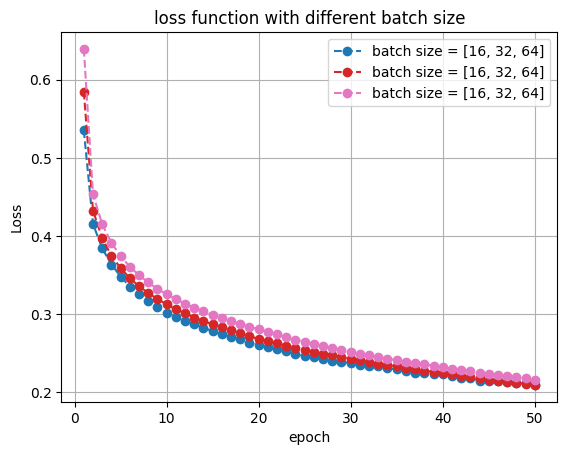

In [23]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    losses = {}

    colors = plt.colormaps['tab10']

    for i, batch_size in enumerate(batch_sizes):
        print(f"batch size: {batch_size}")
        losses[batch_size] = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=epochs, batch_size=batch_size)
        print("")

        plt.plot(range(1, epochs+1), losses[batch_size], marker='o', linestyle='--', label=f'batch size = {batch_sizes}', color=colors(i / len(batch_sizes)))

    plt.title(f'loss function with different batch size')

    plt.xlabel('epoch')
    plt.ylabel('Loss')

    plt.grid()
    plt.legend()
    plt.show()

compare_mini_batch_sizes(x_train, y_train, 32, epochs=50)

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [24]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    parameters = initialize_parameters(X_train.shape[1], hidden_size, y_train.shape[1])

    # y_pred, cache = forward_propagation(X_train, parameters)
    # print(compute_loss(y_pred=y_pred, y_true=y_train))

    cache = None
    gradients = None
    losses = []
    accuracies = []

    print(f"Training with hidden layer size: {hidden_size}")

    for i in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters(parameters, gradients, learning_rate)

        losses.append(compute_loss(y_pred=y_pred, y_true=y_train))

        accuracy = np.mean((y_pred >= np.max(y_pred, axis=1, keepdims=True)).astype(float) * y_train)
        accuracies.append(accuracy)

        if ((i+1) % 10) == 0:
            print(f"Epoch {i+1}, Loss: {np.round(losses[i], 3)}")

    return losses, accuracies

mini batch:
Training with hidden layer size: 32
Epoch 10, Loss: 0.307
Epoch 20, Loss: 0.264
Epoch 30, Loss: 0.239
Epoch 40, Loss: 0.222
Epoch 50, Loss: 0.208

full batch
Training with hidden layer size: 32
Epoch 10, Loss: 2.402
Epoch 20, Loss: 2.279
Epoch 30, Loss: 2.195
Epoch 40, Loss: 2.128
Epoch 50, Loss: 2.068



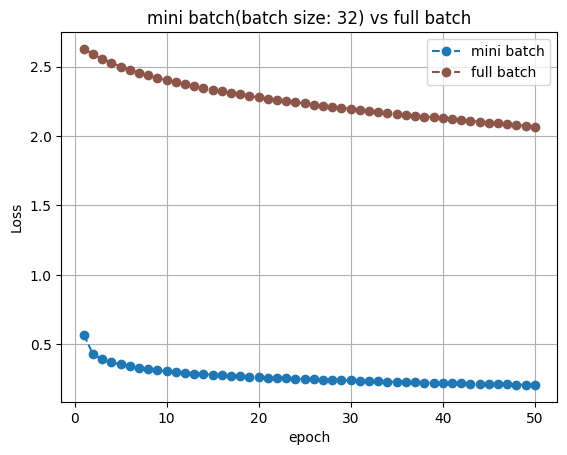

In [25]:
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    colors = plt.colormaps['tab10']

    print("mini batch:")
    mini_batch_losses = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=epochs, batch_size=batch_size)
    print("")
    plt.plot(range(1, epochs+1), mini_batch_losses, marker='o', linestyle='--', label='mini batch', color=colors(0))

    print("full batch")
    full_batch_losses, full_batch_accuracies = train_model_full_batch(X_train, y_train, hidden_size, epochs=epochs)
    print("")
    plt.plot(range(1, epochs+1), full_batch_losses, marker='o', linestyle='--', label='full batch', color=colors(1 / 2))

    plt.title(f'mini batch(batch size: {batch_size}) vs full batch')

    plt.xlabel('epoch')
    plt.ylabel('Loss')

    plt.grid()
    plt.legend()
    plt.show()

compare_mini_batch_and_full_batch(x_train, y_train, 32, epochs=50)